### 실제값을 Y=4X+6 시뮬레이션하는 데이터 값 생성

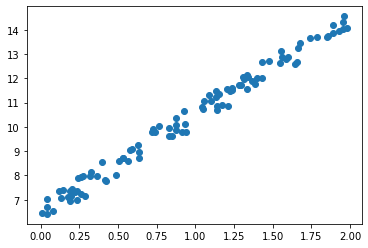

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4x + 6 식을 근사(w1=4, w0=6), random값은 Noise를 위해 만듬
X = 2 * np.random.rand(100, 1)
y = 6 + 4 *X + np.random.rand(100, 1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

In [2]:
X.shape, y.shape

((100, 1), (100, 1))

#### w0과 w1값을 최소화 할 수 있도록 업데이트 수행하는 함수 생성

* 예측 배열 y_pred는 np.dot(X, w1.T) + w0 임. 100개의 데이터 X(1,2,...,100)이 있다면 예측값은 w0 + X(1)w1 + X(2)w1 + ... + X(100)w1이며, 이는 입력 배열 X와 w1배열의 내적임
* 새로운 w1과 w0을 update함
    * 새로운 w_1 = 이전 w_1 $ - \eta * \frac{2}{N}\sum_{i=1}^{N} x_i * (실제값_i * 예측값_i)$
    * 새로운 w_0 = 이전 w_0 $ - \eta * \frac{2}{N}\sum_{i=1}^{N} (실제값_i * 예측값_i)$
        * $ \eta =$ learning_rate

In [3]:
# w1과 w0를 업데이트할 w1_update w2_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))
    
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [4]:
w0 = np.zeros((1, 1))
w1 = np.zeros((1, 1))

y_pred = np.dot(X, w1.T) + w0
# print('y_pred : ', y_pred)

diff = y - y_pred
# print('diff : ', diff)
print('diff.shape : ', diff.shape)

w0_factors = np.ones((100, 1))
w1_update = -(2/100)*0.01*(np.dot(X.T, diff))
w0_update = -(2/100)*0.01*(np.dot(w0_factors.T, diff))
print(w1_update.shape, w0_update.shape)

w1, w0

diff.shape :  (100, 1)
(1, 1) (1, 1)


(array([[0.]]), array([[0.]]))

#### 반복적으로 경사하강법을 이용하여 get_weight_updates()를 호출하여 w1과 w0을 업데이트 하는 함수 생성

In [5]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0을 업데이트 적용함
def gradient_descent_steps(X, y, iters=10000):
    # w0과 w1를 모두 0으로 초기화
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    
    # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출하여 w1, w2 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

#### 예측 오차 비용 계산을 수행하는 함수 생성 및 경사 하강법 수행

In [6]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0, 0], w0[0, 0]))
y_pred = w1[0, 0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.028 w0:6.490
Gradient Descent Total Cost:0.0775


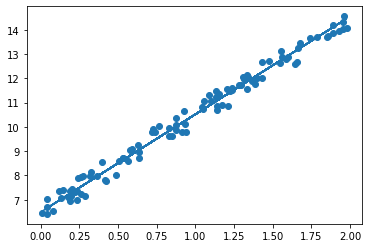

In [7]:
plt.scatter(X, y)
plt.plot(X, y_pred)

#### 미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출

In [8]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 1000000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [9]:
np.random.permutation(X.shape[0])

array([91, 29,  2, 50, 44, 78, 33, 65, 75, 45, 66, 62, 93, 80, 96, 59, 48,
       53, 54, 31, 77, 12,  9, 38, 17,  3, 79, 95, 82, 90, 40,  6,  1, 23,
       37, 30, 34, 69, 68, 27, 10, 26, 60, 39, 57, 11, 47, 15, 52, 84,  5,
       99, 76,  7, 88, 35, 61,  4, 97, 20, 87, 22, 14, 42, 74, 25, 86, 64,
       55, 85, 13, 98, 72, 19, 32, 56,  8, 51, 67, 94, 24, 36, 16, 63,  0,
       58, 81, 28, 89, 73, 21, 46, 41, 49, 83, 43, 92, 18, 71, 70])

In [10]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1 : ', round(w1[0, 0], 3), "w0 : ", round(w0[0, 0], 3))
y_pred = w1[0, 0] * X + w0
print('Stochastic Gradient Descent Total Cost : {0:.4f}'.format(get_cost(X, y_pred)))

w1 :  4.031 w0 :  6.486
Stochastic Gradient Descent Total Cost : 90.5195


---

## 사이킷런 LinearRegression 클래스

* class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
    * fit_intercept : intercept(절편)을 계산할 것인지
    * normalize : True값이라면 회귀를 수행하기 전에 입력 데이터 세트르르 정규화합니다.
    * coef_ : fit() 메서드를 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성 Shape는 (Target값 계수, 피처 개수)
    * intercept_ : 절편 값
* LinearRegression 클래스는 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스입니다.
* LinearRegression 클래스는 fit() 메서드로 X, y 배열을 입력 받으면 회귀 계수(Cofficients)인 W를 coef_ 속성에 저장합니다.

### 선형 회귀의 다중 공선성 문제

* 일반적으로 선형 회귀는 입력 피처의 독립성에 많은 영향을 받습니다. 피처간의 상관관계가 매우 높은 경우, 분산이 매우 커져서 오류에 매우 민감해집니다.
* 위와 같은 현상을 다중 공선성(multi-collinearity) 문제라고 합니다.
* 일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용합니다.

### 회귀 평가 지표

|평가 지표|설명|
|:-------------:|:-------|
| MAE | Mean Absolute Error이며 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것입니다. |
| MSE | Mean Squared Error이며 실제값과 예측값의 차이를 제곱해 평균한 것입니다. |
| MSLE | MSE에 로그를 적용한 것입니다. 결정값이 클수록 오류값도 커지기 때문에 일부 큰 오류값들로 인해 전체 오류값이 커지는 것을 막아줍니다. |
| RMSE | MES 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 루트를 씌운것이 RMSE(Root Mean Squared Error)입니다. |
| RMSLE | RMSE에 로그를 적용한 것입니다. 결정값이 클수록 오류값도 커지기 때문에 일부 큰 오류값들로 인해 전체 오류값이 커지는 것을 막아줍니다. |
| $R^2$ | 분산 기반으로 예측 성능을 평가합니다. 실제 값의 분산 대비 예측값의 분산 비율을 지표로 하여, 1에 가까울수록 예측 정확도가 높습니다. |

### 사이킷런 Scoring 함수에 회귀평가 적용 시 주의사항

* cross_val_score, GridSearchCV와 같은 Scoring함수에 회귀 평가 지표를 적용 시 유의 사항
* MAE의 사이킷런 scroing 파라미터 값은 'neg_mean_absolute_error'입니다. 이는 Negative(음수)값을 가진다는 의미인데, MAE는 절대값의 합이기 때문에 음수가 될 수 없습니다.
* Scoring함수에 'neg_mean_absolute_error'를 적용해 음수값을 반환하는 이유는 사이킷런의 Scoring 함수가 score값이 클수록 좋은 평가 결과로 자동 평가하기 때문입니다. 따라서 -1을 원래의 평가 지표 값에 곱해서 음수(Negative)를 만들어 작은 오류 값이 더 큰 숫자로 인식하게 합니다.
    * 예를 들어 10>1 이지만 음수를 곱하면 -1>-10이 됩니다.
        * 성과지표는 일반적으로 큰수일수록 좋은 모델임을 나타내는데, 회귀 평가의 지표들은 반대로 숫자가 작을수록 좋은 모델임을 나타내기 때문에 -1값을 곱한다.
* metrics.mean_absolute_error()와 같은 사이킷런 평가 지표API는 정상적으로 양수의 값을 반환합니다. 하지만 Scoring함수의 scoring파라미터 값 'neg_mean_absolute_error'가 의미하는 것은 -1 * metrics.mean_absolute_error()이니 주의가 필요합니다.

### 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이터셋 로드
boston = load_boston()

# boston 데이터셋 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함.
bostonDF['PRICE'] = boston.target

print('Boston 데이터셋 크기 : ', bostonDF.shape)

bostonDF.head()

Boston 데이터셋 크기 :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


* CRIM: 지역별 범죄 발생율
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* INDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)


* **각 컬럼별로 주택가격에 미치는 영향도를 조사**

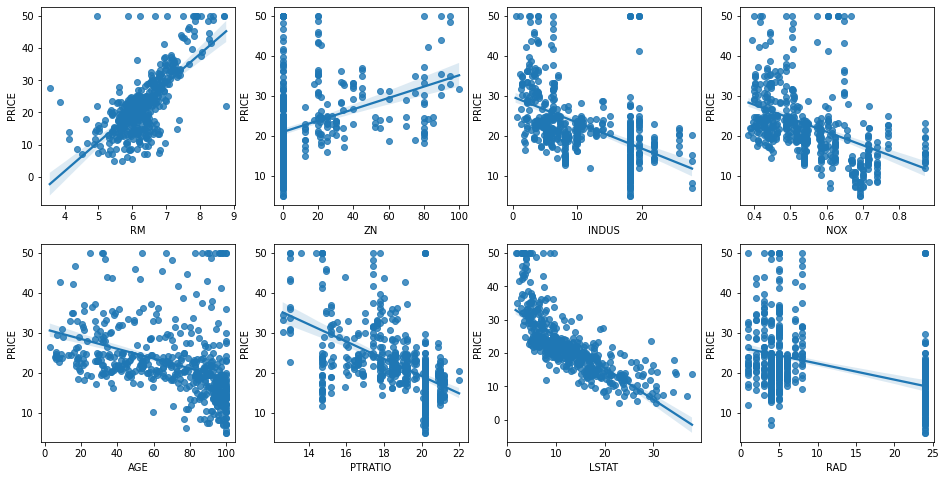

In [12]:
# 2개의 행과 4개의 열을 가진 subplots를 이용, axs는 4*2개의 ax를 가짐
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2 )
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 사본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

#### 학습과 테스트 데이터 세트로 분리하고 학습/예측/평가 수행

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [14]:
print('절편 값 : ', lr.intercept_)
print('회귀 계수값 : ', np.round(lr.coef_, 1))

절편 값 :  40.995595172164315
회귀 계수값 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [15]:
# 회귀 계수를 큰 값으로 정렬하기 위해 Series로 생성, index가 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False) # NOX값이 크기 때문에 예측결과가 NOX값의 영향을 많이 받음

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [16]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5Fold 셋으로 MSE를 구한 뒤, 이를 기반으로 다시 RMSE를 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5) # 음수 반환
rmse_scores = np.sort(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring='neg_mean_squared_error')로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))


5 folds의 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores :  [12.46 26.05 33.07 33.31 80.76]
5 folds의 평균 RMSE : 37.132


---

## 다항회귀 개요(Polynomial Regression)

* 다항회귀는 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것을 지칭합니다.
* 데이터 세트에 대해서 피처 X에 대해 Target Y값의 관계를 단순 선형 회귀 직선형으로 표현한 것보다 다항 회귀 곡선형으로 표현한 것이 더 예측 성능이 높습니다.

### 선형 회귀와 비선형 회귀의 구분

* 선형 회귀
    * $ Y = w0 + w1 * x1 + w2 * x2 + w3 * x1 * x2 + w4 * (x1)^2 + w5 * (x2)^2 $
* 비선형 회귀
    * $ Y = w1 * \cos(X + w4) + w2 * \cos(2*x + w4) + w3 $
    * $ Y = w1 * X^(W2) $
    
<br>
* 다항 회귀는 선형회귀입니다. 회귀에서 선형 회귀/비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것이지 독립변수의 선형/비선형 여부와는 무관합니다.

### 사이킷런에서의 다항 회귀

* 사이킷런은 다항회귀를 바로 API로 제공하지 않습니다.
* 대신 PolynomialFeatures 클래스로 원본 단항 피처들을 다항 피처들로 변환한 데이터 세트에 LinearRegression 객체를 적용하여 다양회귀 기능을 제공합니다.
* PolynomialFeatures : 원본 피처 데이터 세트를 기반으로 degree 차수에 따른 다항식을 적용하여 새로운 피처들을 생성하는 클래스 피처 엔지니어링의 기법중의 하나임.

* 단항 피처 $[x_1, x_2]$를 Degree=2, 즉 2차 다항 피처로 변환한다면?
    * $(x_1 + x_2)^2$  $[1, x_1, x_2, x_1x_2, x_1^2, x_2^2]$의 다항 피처들로 변환
    * 1차 단항 피처들의 값이 $[x_1, x_2] = [0, 1]$일 경우
    * 2차 다항 피처들의 값은 $[1, x_1=0, x_2=1, x_1x_2=0, x_1^2=0, x_2^2=1]$ 형태인 [1, 0, 1, 0, 0, 1]로 변환

* 단항 피처 $[x_1, x_2]$를 Degree=3, 즉 3차 다항 피처로 변환한다면?
    * $(x_1 + x_2)^3$의 식 전개에 대응되는 $[1, x_1, x_2, x_1x_2, x_1^2, x_2^2, x_1^3, x_1^2x_2, x_1x_2^2, x_2^3]$

* PolynomialFeatures변환 -> LinearRegression 학습
    1. 단항 피처 $[x_1, x_2]$를 $[1, x_1=0, x_2=1, x_1x_2=0, x_1^2=0, x_2^2=1]$로 변경(degree=2로 가정)
    2. PolynomialFeatures로 변환된 x 피처들을 LinearRegression객체로 학습
* 사이킷런에서는 일반적으로 Pipeline 클래스를 이용하여, PolynomialFeatures 변환과 LinearRegression 학습/예측을 결합하여 다항 회귀를 구현합니다.

## Polynomial Regression과 오버피팅/언더피팅의 이해

In [17]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1], [2,3]]의 2*2 행렬 생성
X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature:\n', X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


3차 다항식 결정값을 구하는 함수 polynomial_func(X) 생성. 즉 회귀식은 결정값 $ y = 1 + 2x_1 + 3x_1^2 + 4x_2^3 $

In [18]:
def polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
    return y

X = np.arange(0, 4).reshape(2,2)

print('일차 단항식 계수 feature :\n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값 : \n', y)

# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature : \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 shape :', model.coef_.shape)

일차 단항식 계수 feature :
 [[0 1]
 [2 3]]
삼차 다항식 결정값 : 
 [  5 125]
3차 다항식 계수 feature : 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 shape : (10,)


#### 사이킷런 파이프라인(Pipeline)을 이용하여 3차 다항회귀 학습

* 사이킷런의 Pipeline 객체는 Feature 엔지니어링 변환과 모델 학습/예측을 순차적으로 결합해줍니다.

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature 변환과 Linear Regression 연결
model = Pipeline([ ('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression()) ])

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2 )) # LinearRegression 객체의 coef_ 

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


#### 다중 회귀를 이용한 보스턴 주택가격 예측

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

# boston 데이터셋 로드
boston = load_boston()

# boston 데이터셋 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

# boston dataset의 target array는 주택 가격임, 이를 PRICE 컬럼으로 DataFrame에 추가함.

bostonDF['PRICE'] = boston.target

print('Boston 데이터셋 크기 : ', bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# Pipeline을 이용하여 PolynomialFeatures 변환과 LinearRegression 적용을 순차적으로 결합.
p_model = Pipeline([ ('poly', PolynomialFeatures(degree=2, include_bias=False)),
                     ('linear', LinearRegression()) ]) # degree=3으로 변경하면 심각한 오버피팅 발생

p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

Boston 데이터셋 크기 :  (506, 14)
MSE : 15.556, RMSE : 3.944
Variance score : 0.782


In [21]:
X_train_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train, y_train)
X_train_poly.shape, X_train.shape # 피처 개수 13 -> 104

((354, 104), (354, 13))

### Polynomial Regression을 이용한 Underfitting, Overfitting 이해

#### cosine 곡선에 약간의 Noise 변동값을 더하여 실제값 곡선을 만듬

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random() 값으로 구성된 X값에 대해 Cosine 변환값을 반환
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 random값을 순서대로 sampling한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun)_에서 약간의 Noise 변동값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1

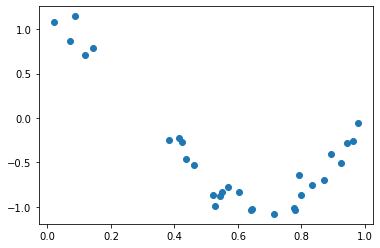

In [23]:
plt.scatter(X, y)

Degree 1, 회귀계수는 [-2.]입니다.
Degree 1, 회귀계수는 0.41입니다.
Degree 4, 회귀계수는 [  0. -18.  24.  -7.]입니다.
Degree 4, 회귀계수는 0.04입니다.
Degree 15, 회귀계수는 [-2.98300000e+03  1.03900000e+05 -1.87417000e+06  2.03717200e+07
 -1.44874017e+08  7.09319141e+08 -2.47067172e+09  6.24564702e+09
 -1.15677216e+10  1.56895933e+10 -1.54007040e+10  1.06457993e+10
 -4.91381016e+09  1.35920642e+09 -1.70382078e+08]입니다.
Degree 15, 회귀계수는 182581084.83입니다.


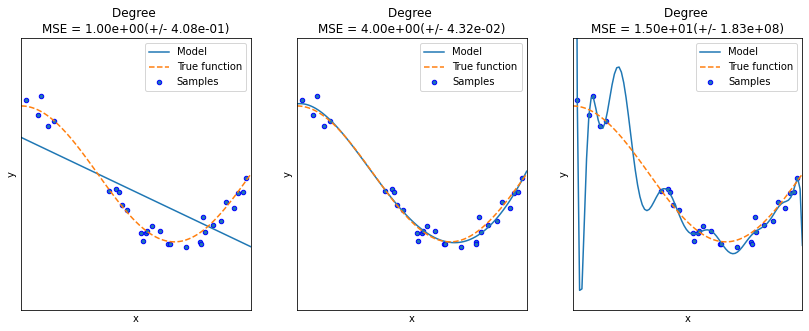

In [24]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([ ('polynomial_features', polynomial_features), 
                            ('linear_regression', linear_regression)
                        ])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    
    print('Degree {0}, 회귀계수는 {1}입니다.'.format(degrees[i], np.round(coefficients), 2))
    print('Degree {0}, 회귀계수는 {1:.2f}입니다.'.format(degrees[i], -1*np.mean(scores)))
    
    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree \nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()
    
# degree 15 -> 회귀계수가 크게 나옴 -> 조금만 벗어나도 값이 크게 달라짐

#### 편향-분산 트레이드 오프(Bias-Variance Trade off)

* Bias(편향) : 예측이 정답에서 얼마나 떨어져 있는지
* Variance(분산) : 예측의 변동폭이 얼마나 큰지
<br>

* Underfitting(과소적합) : 편향이 높고 분산이 낮은 경우
* Overfitting(과대적합) : 편향이 낮고 분산이 높은 경우

---

## 규제 선형 회귀의 개요

* 앞의 예제에서 Degree=15의 다항회귀는 지나치게 모든 데이터에 적합한 회귀식을 만들기 위해서 다항식이 복잡해지고 회귀 계수가 매우 크게 설정이 되면서 과대적합이 되었고, 평가 데이터 세트에 대해서는 형편없는 예측 성능을 보였습니다. 따라서 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야 합니다.

* 최적 모델을 위한 Cost 함수 구성요소 = 학습데이터 잔차 오류 최소화 + 회귀계수 크기 제어
    * 비용 함수 목표 = $ Min( RSS(W) + alpha *  \lvert\lvert W \rvert\rvert^2_2  $
    * alpha는 학습 데이터 적합 정도와 휘귀 계수 값의 크기 제어를 수행하는 튜닝 파라미터

### 규제 선형 모델에서 alpha의 역할

* alpha가 0(또는 매우 작은 값)이라면 비용 함수 식은 기존과 동일한 Min(RSS(W) + 0)이 될 것입니다.
* 반면에 alpha가 무한대(또는 매우 큰 값)이라면 비용 함수 식은 RSS(W)에 비해 $ alpha *  \lvert\lvert W \rvert\rvert^2_2  $값이 너무 커지게 되므로 W 값을 0(또는 매우 작게)으로 만들어야 Cost가 최소화되는 비용 함수 목표를 달성할 수 있습니다.


### 규제 선형 회귀의 유형

* 이처럼 비용 함수에 alpha값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제(Regularization)이라 부릅니다.
* 규제는 크게 L2 방식과 L1 방식으로 구분됩니다. L2 규제는 위에서 설명한 바와 같이 $ alpha *  \lvert\lvert W \rvert\rvert^2_2  $와 같이 w의 제곱에 대해 패널티를 부여하는 방식을 말합니다. L2 규제를 적용한 회귀를 릿지(Ridge) 회귀라고 합니다.
* 라쏘(Lasso)회귀는 L1규제를 적용한 회귀입니다. L1 규제는 $ alpha *  \lvert\lvert W \rvert\rvert_1 $ 와 같이 W의 절대값에 대해 패널티를 부여합니다. L1 규제를 적용하면 영향력이 크지 않은 회귀 계수 값을 0으로 변환합니다.
* ElasticNet은 L1, L2 규제를 함께 결합한 모델입니다. 주로 피처가 많은 데이터 세트에서 적용되며, L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정합니다.

---

## Regularized Linear Model - Ridge, Lasso


### Regularized Linear Model - Ridge Regression

* Ridge Regression : L2 규제를 적용한 회귀

In [26]:
# 앞의 LinearRegression예제에서 분할한 feature 데이터 셋인 X_data와 Target 데이터셋을 그대로 이용
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# boston 데이터셋 로드
boston = load_boston()

# boston 데이터셋 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함.
bostonDF['PRICE'] = boston.target
print('Boston 데이터셋 크기 : ', bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

Boston 데이터셋 크기 :  (506, 14)
5 folds의 개별 Negative MSE scores :  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE : 5.518


#### alpha값을 0, 0.1, 1, 10, 100 으로 변경하면서 RMSE 측정

In [28]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    
    # cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    
    print('alpha {0} 일 때 5 folds의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))
    
# alpha값이 늘어날수록 RMSE가 줄어듬

alpha 0 일 때 5 folds의 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds의 평균 RMSE : 5.788
alpha 1 일 때 5 folds의 평균 RMSE : 5.653
alpha 10 일 때 5 folds의 평균 RMSE : 5.518
alpha 100 일 때 5 folds의 평균 RMSE : 5.330


#### 각 alpha에 따른 회귀 계수 값을 시각화, 각 alpha값 별로 plt.subplots로 맷플롯립 측 생성

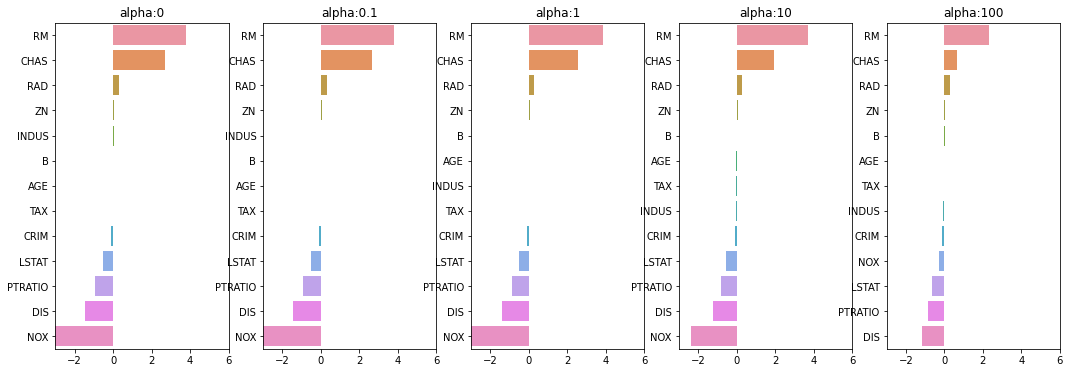

In [30]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fix, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)

# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장, pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns) #coef_ : 계수
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화, 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
# for문 바깥에서 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

#### alpha값에 따른 컬럼별 회귀계수 출력

In [32]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764
